In [1]:
import os
import h5py
import pylab
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

################################################################################
#
#    PLOTTING OPTIONS
#
################################################################################


# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [3]:
time = np.arange(-5,11,1)

In [4]:
time

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
lnb_330={}
lnb_220={}
lnb_440={}
lnb_221={}
lnb_210={}

In [6]:
for t in time:
    if t<0:
        name = 'M'+str(-t)+'MS'
    else:
        name = str(t)+'MS'
    try:
        f220=h5py.File('./220/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW191109_'+name+'-1126259200-400.hdf','r')
        f330=h5py.File('./220_330/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW191109_'+name+'-1126259200-400.hdf','r')
        f440=h5py.File('./220_440/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW191109_'+name+'-1126259200-400.hdf','r')
        f221=h5py.File('./220_221/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW191109_'+name+'-1126259200-400.hdf','r')
        f210=h5py.File('./220_210/4ogcringdown_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW191109_'+name+'-1126259200-400.hdf','r')
        lnb_220[t]=f220.attrs['log_evidence']
        lnb_330[t]=f330.attrs['log_evidence']
        lnb_440[t]=f440.attrs['log_evidence']
        lnb_221[t]=f221.attrs['log_evidence']
        lnb_210[t]=f210.attrs['log_evidence']
    except FileNotFoundError:
        pass
    

In [7]:
lnb_220

{-5: -662251.5243397932,
 -4: -662252.3564956757,
 -3: -662248.1792811169,
 -2: -662243.2580800987,
 -1: -662243.225316715,
 0: -662243.3867174985,
 2: -662242.1430858497,
 6: -662232.7196077111,
 7: -662232.6191141449,
 9: -662231.4554716282,
 10: -662233.2492030761}

In [8]:
lnb_330

{-5: -662251.1586591853,
 -4: -662251.2277914552,
 -3: -662247.3655397781,
 -2: -662243.5248129296,
 -1: -662242.9729382041,
 0: -662243.6053644769,
 2: -662241.1315509859,
 6: -662233.2000781944,
 7: -662232.3624205454,
 9: -662232.0413776635,
 10: -662233.7886970479}

In [9]:
lnb_440

{-5: -662252.559753804,
 -4: -662253.4510835112,
 -3: -662249.6404700432,
 -2: -662243.8930238221,
 -1: -662243.58345846,
 0: -662243.5026457676,
 2: -662240.6846085619,
 6: -662234.0540851095,
 7: -662232.918214358,
 9: -662231.7454713142,
 10: -662233.6206355747}

In [10]:
lnb_210

{-5: -662241.7256342302,
 -4: -662241.2129779839,
 -3: -662241.1028547351,
 -2: -662239.435502119,
 -1: -662239.057230593,
 0: -662239.6749380055,
 2: -662239.0715946638,
 6: -662232.3304922873,
 7: -662232.1689003526,
 9: -662231.3755603998,
 10: -662233.2396907433}

Text(0.5, 0, '$t-t_\\mathrm{ref}$ ms')

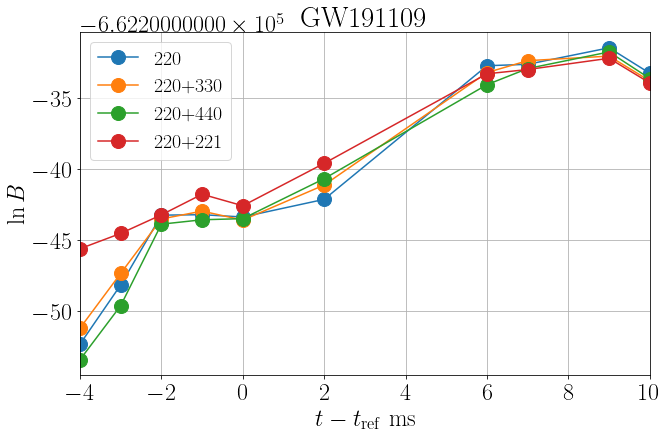

In [12]:
label=['220','220+330','220+440','220+221','220+210']
for i,dic in enumerate([lnb_220,lnb_330,lnb_440,lnb_221]):
    x,y=zip(*dic.items())
    plt.plot(x,y,label=label[i],marker='o')
#plt.scatter(4,threemode.attrs['log_evidence'],marker='^',color='black',label='220+330+440')
#plt.axvline(0.003271797742434115*1000,ls='--',label='$10M_f$')
plt.legend()
plt.title('GW191109')
plt.ylabel('$\ln B$')
plt.xlim(-4,10)
plt.xlabel('$t-t_\mathrm{ref}$ ms')